# <u><b> Objective </b></u>
## <b>To predict the whether a customer will churn or not, based on the variables available in the Telco customer churn data. </b>


### Logistic regression does not make many of the key assumptions of linear regression and general linear models that are based on ordinary least squares algorithms – particularly regarding linearity, normality, homoscedasticity, and measurement level.

### First, logistic regression does not require a linear relationship between the dependent and independent variables.  Second, the error terms (residuals) do not need to be normally distributed.  Third, homoscedasticity is not required.  Finally, the dependent variable in logistic regression is not measured on an interval or ratio scale.

### However, some other assumptions still apply.

### First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

### Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

### Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

### Fourth, logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.


### <b> In this assignment, you need to do the following : </b>

* ### Remove correlated variables and run Logistic Regression
* ### Also implement regularized logistic regression using the hyperparameter C in the sklearn implementation. Add details about how this hyperparameter affects the learning and performance of the model.
* ### Evaluate your logistic regression models using metrics such as roc_auc, log_loss, precision, recall, accuracy and f-score. You already know these metrics from your assignments in Module 1. Explain your observations about these metrics results.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
telco_df = pd.read_csv('/content/drive/MyDrive/DataSets/WA_Fn-UseC_-Telco-Customer-Churn.csv')

telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


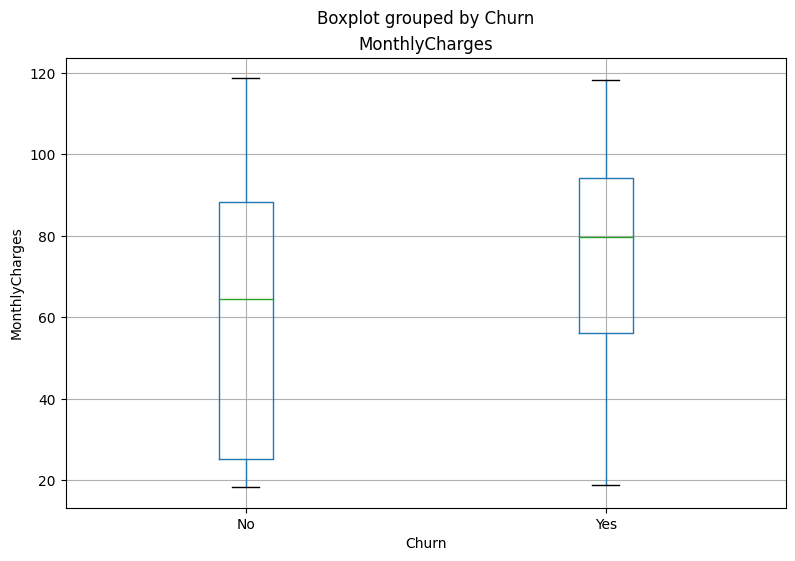

In [ ]:
# We will use only 2 feature that is tenure and monthlycharges to simplify our experiment

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
telco_df.boxplot(column = 'MonthlyCharges', by = 'Churn', ax = ax)
ax.set_ylabel("MonthlyCharges")
plt.show()

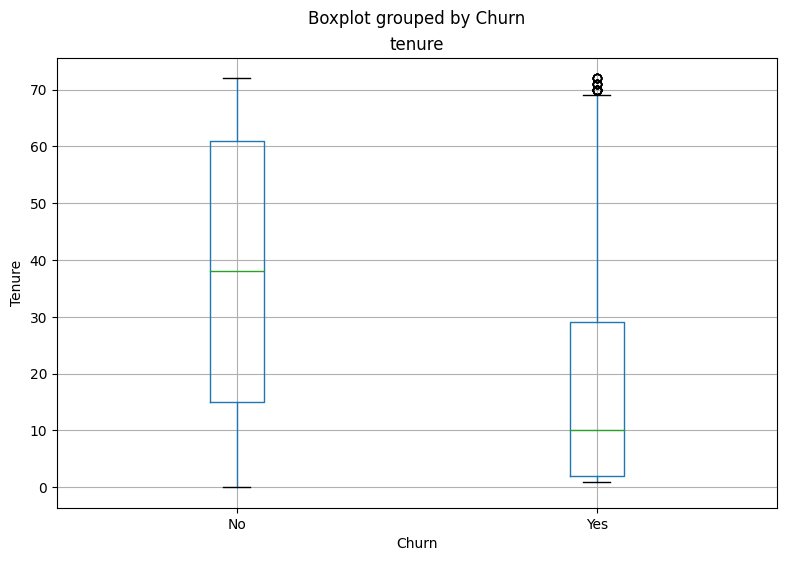

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
telco_df.boxplot(column = 'tenure', by = 'Churn', ax = ax)
ax.set_ylabel("Tenure")
plt.show()

In [ ]:
# in churn column we haveing value like Yes or No, will convert it to 1 and 0

telco_df['class'] = telco_df['Churn'].apply(lambda x:1 if x=='Yes' else 0)

X = telco_df[['tenure','MonthlyCharges']].copy()

y = telco_df['class'].copy()

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 348)

print(X_train.shape)
print(X_test.shape)

(4930, 2)
(2113, 2)


In [ ]:
y_train.value_counts()

y_test.value_counts()

0    1548
1     565
Name: class, dtype: int64

In [ ]:

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True,max_iter = 1000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Evaluating the performance of the trained model

# get the predicted probabilities

train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

X_test

,tenure,MonthlyCharges
3704,68,73.00
5938,34,108.90
6195,4,72.20
1041,16,19.30
5278,56,109.60
...,...,...
2362,49,39.20
666,2,69.65
3829,43,101.00
4545,1,44.15


In [ ]:
test_preds  # it is giving probablites for both tenure and monthlycharges column but we are interested in only one column

train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [ ]:
# get the predicted classes that is in the form of 1 or 0

train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

test_class_preds


array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# will check with evalution matrixes

from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7833671399594321
The accuracy on test data is  0.7908187411263606


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
